In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = pd.read_csv("data/train/train.csv")
X = X.drop(columns=['index'])
X.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0      202500.0   Pensioner   
1      F   N       N          1      157500.0     Working   
2      M   Y       N          0      135000.0     Working   
3      F   Y       N          2      112500.0     Working   
4      M   Y       Y          1      225000.0     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment      -19031   
1               Higher education     Married  House / apartment      -15773   
2  Secondary / secondary special     Married  House / apartment      -13483   
3  Secondary / secondary special     Married  House / apartment      -12270   
4  Secondary / secondary special     Married  House / apartment      -16175   

   DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email      occyp_type  \
0         365243           1           0      0      0             NaN   
1           -309           1           0      1      0     Sales staff   
2          -1816           1           1      1      0        Laborers   
3           -150           1           0      1      0  Security staff   
4          -2371           1           0      0      0         Drivers   

   family_size  begin_month  
0            2          -53  
1            3          -26  
2            2           -9  
3            4          -12  
4            3           -3

In [3]:
y = pd.read_csv("data/train/train_label.csv")
y = y.drop(columns=['index'])
y.head()

credit
0       1
1       0
2       1
3       1
4       1

In [4]:
df = pd.concat([X,y], axis =1)
df

gender car reality  child_num  income_total           income_type  \
0          F   Y       Y          0      202500.0             Pensioner   
1          F   N       N          1      157500.0               Working   
2          M   Y       N          0      135000.0               Working   
3          F   Y       N          2      112500.0               Working   
4          M   Y       Y          1      225000.0               Working   
...      ...  ..     ...        ...           ...                   ...   
13223      F   N       N          0      225000.0               Working   
13224      F   Y       Y          0      292500.0  Commercial associate   
13225      F   N       Y          0      135000.0               Working   
13226      M   N       Y          1      157500.0  Commercial associate   
13227      F   Y       Y          2       67500.0               Working   

                            edu_type     family_type         house_type  \
0      Secondary / secondary special         Married  House / apartment   
1                   Higher education         Married  House / apartment   
2      Secondary / secondary special         Married  House / apartment   
3      Secondary / secondary special         Married  House / apartment   
4      Secondary / secondary special         Married  House / apartment   
...                              ...             ...                ...   
13223  Secondary / secondary special           Widow  House / apartment   
13224               Higher education         Married  House / apartment   
13225  Secondary / secondary special  Civil marriage  House / apartment   
13226  Secondary / secondary special         Married  House / apartment   
13227               Higher education         Married  House / apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0          -19031         365243           1           0      0      0   
1          -15773           -309           1           0      1      0   
2          -13483          -1816           1           1      1      0   
3          -12270           -150           1           0      1      0   
4          -16175          -2371           1           0      0      0   
...           ...            ...         ...         ...    ...    ...   
13223      -20657          -5637           1           0      0      0   
13224      -18409          -3482           1           0      0      0   
13225      -14625          -7827           1           0      1      1   
13226      -10676          -2326           1           0      1      1   
13227      -11925          -1621           1           0      0      0   

           occyp_type  family_size  begin_month  credit  
0                 NaN            2          -53       1  
1         Sales staff            3          -26       0  
2            Laborers            2           -9       1  
3      Security staff            4          -12       1  
4             Drivers            3           -3       1  
...               ...          ...          ...     ...  
13223     Accountants            1          -43       1  
13224     Sales staff            2          -53       1  
13225             NaN            2          -34       1  
13226        Laborers            3          -16       1  
13227             NaN            4           -4       1  

[13228 rows x 19 columns]

#### Data types 확인

In [5]:
df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size        int64
begin_month        int64
credit             int64
dtype: object

#### pandas_profiling 라이브러리를 활용한 기본적 분석

In [6]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### data shpae

In [89]:
df.shape

(13228, 19)

##### null 값이 존재하는지 확인

In [90]:
df.isnull().any()

gender           False
car              False
reality          False
child_num        False
income_total     False
income_type      False
edu_type         False
family_type      False
house_type       False
DAYS_BIRTH       False
DAYS_EMPLOYED    False
FLAG_MOBIL       False
work_phone       False
phone            False
email            False
occyp_type        True
family_size      False
begin_month      False
credit           False
dtype: bool

In [91]:
df.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       4132
family_size         0
begin_month         0
credit              0
dtype: int64

#### 1. 결측치 처리

occyp_type의 경우 총 13227개의 데이터 중에 4132개의 데이터가 null 값으로 이루어진 것을 확인할 수 있다. occyp_type은 직업 유형으로 null의 의미가 직업이 없는 사람을 뜻한다면 신용도를 평가하는데 유의미 할 수 있어 None으로 바꾸어 주었다.

In [92]:
df = df.fillna('None')

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0      202500.0   Pensioner   
1      F   N       N          1      157500.0     Working   
2      M   Y       N          0      135000.0     Working   
3      F   Y       N          2      112500.0     Working   
4      M   Y       Y          1      225000.0     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment      -19031   
1               Higher education     Married  House / apartment      -15773   
2  Secondary / secondary special     Married  House / apartment      -13483   
3  Secondary / secondary special     Married  House / apartment      -12270   
4  Secondary / secondary special     Married  House / apartment      -16175   

   DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email      occyp_type  \
0         365243           1           0      0      0            None   
1           -309           1           0      1      0     Sales staff   
2          -1816           1           1      1      0        Laborers   
3           -150           1           0      1      0  Security staff   
4          -2371           1           0      0      0         Drivers   

   family_size  begin_month  credit  
0            2          -53       1  
1            3          -26       0  
2            2           -9       1  
3            4          -12       1  
4            3           -3       1

In [93]:
df.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

#### 2. 필요없는 column 삭제
FLAG_MOBIL의 경우 모든 값들이 1로 이루어진 것을 확인할 수 있다. 데이터내의 모든 사람이 핸드폰을 소유하고 있다는 사실만 확인하고 예측에는 도움이 되지 않으므로 column을 삭제한다.

In [27]:
df["FLAG_MOBIL"].describe()

count    13228.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: FLAG_MOBIL, dtype: float64

In [28]:
df = df.drop(columns=['FLAG_MOBIL'])
df.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0      202500.0   Pensioner   
1      F   N       N          1      157500.0     Working   
2      M   Y       N          0      135000.0     Working   
3      F   Y       N          2      112500.0     Working   
4      M   Y       Y          1      225000.0     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment      -19031   
1               Higher education     Married  House / apartment      -15773   
2  Secondary / secondary special     Married  House / apartment      -13483   
3  Secondary / secondary special     Married  House / apartment      -12270   
4  Secondary / secondary special     Married  House / apartment      -16175   

   DAYS_EMPLOYED  work_phone  phone  email      occyp_type  family_size  \
0         365243           0      0      0             NaN            2   
1           -309           0      1      0     Sales staff            3   
2          -1816           1      1      0        Laborers            2   
3           -150           0      1      0  Security staff            4   
4          -2371           0      0      0         Drivers            3   

   begin_month  credit  
0          -53       1  
1          -26       0  
2           -9       1  
3          -12       1  
4           -3       1

### Target variable 분석

In [29]:
df['credit'].count()

13228

In [30]:
df['credit'].value_counts()

1    11617
0     1611
Name: credit, dtype: int64

In [32]:
# r그래프를 통해 확인하기 위한 normalizing 작업

df['credit'].value_counts(normalize=True)*100

1    87.821288
0    12.178712
Name: credit, dtype: float64

<AxesSubplot:title={'center':'credit'}>

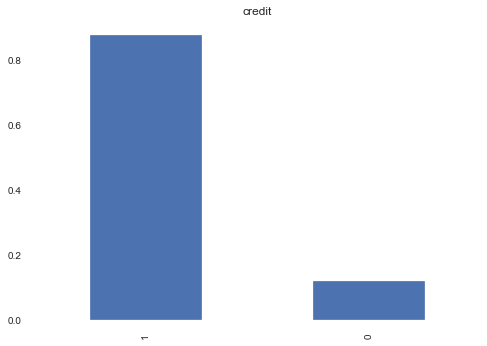

In [33]:
# 아래의 그래프를 통해 낮은 신용도를 가진 0이 1에 비해 가진 데이터가 아주 작은것을 확인할 수 있다.

df['credit'].value_counts(normalize=True).plot.bar(title = 'credit')

#### 1. 학습데이터 분석 (categorical features)

In [42]:
df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

#### Gender 분석

여성의 비율이 66% 남성의 비율이 33%로 여성의 비율이 높은 것을 확인할 수 있다.

In [39]:
df['gender'].value_counts()

F    8795
M    4433
Name: gender, dtype: int64

In [40]:
df['gender'].value_counts(normalize=True) * 100

F    66.487753
M    33.512247
Name: gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

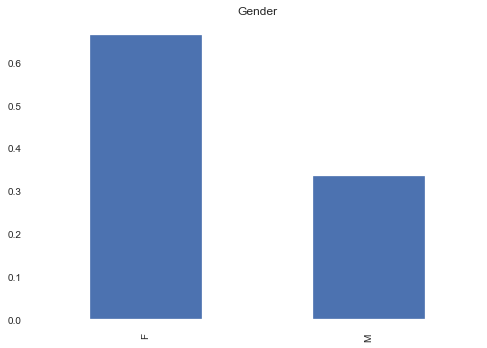

In [41]:
df['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

#### Car 분석

자동차를 보유하고 있지 않은 사람이 62% 보유한 사람이 37%로 자동차를 보유하지 않은 사람의 비율이 높은 것을 확인할 수 있다.

In [43]:
df['car'].value_counts()

N    8251
Y    4977
Name: car, dtype: int64

In [44]:
df['car'].value_counts(normalize=True) * 100

N    62.375265
Y    37.624735
Name: car, dtype: float64

<AxesSubplot:title={'center':'Car'}>

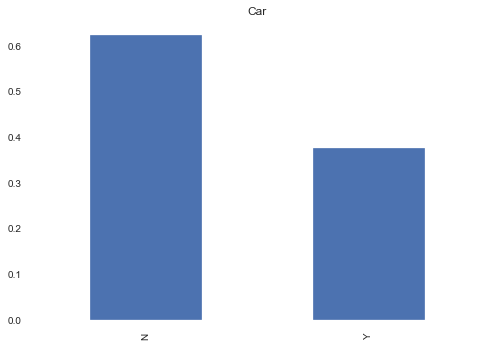

In [45]:
df['car'].value_counts(normalize=True).plot.bar(title= 'Car')

#### Car 분석

자동차를 보유하고 있지 않은 사람이 62% 보유한 사람이 37%로 자동차를 보유하지 않은 사람의 비율이 높은 것을 확인할 수 있다.

In [46]:
df['reality'].value_counts()

Y    8823
N    4405
Name: reality, dtype: int64

In [47]:
df['reality'].value_counts(normalize=True) * 100

Y    66.699425
N    33.300575
Name: reality, dtype: float64

<AxesSubplot:title={'center':'Reality'}>

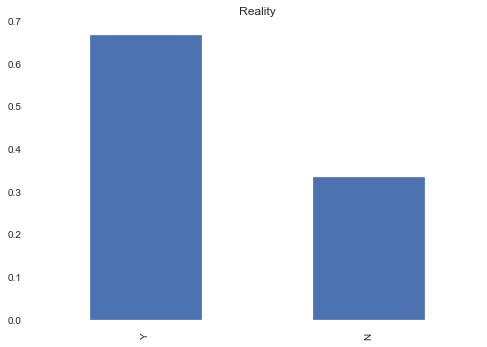

In [49]:
df['reality'].value_counts(normalize=True).plot.bar(title= 'Reality')

#### child_num 분석

child_num 분석을 통해 자녀의 수가 0명인 경우가 70%로 대부분이고 1명인 경우 20% 2명인 경우 8%로 자녀가 있다면 1명 혹은 2명인 것을 확인할 수 있다. 

In [54]:
df['child_num'].value_counts()

0     9144
1     2751
2     1150
3      148
4       27
5        5
14       2
7        1
Name: child_num, dtype: int64

In [55]:
df['child_num'].value_counts(normalize=True) * 100

0     69.126096
1     20.796795
2      8.693680
3      1.118839
4      0.204112
5      0.037799
14     0.015119
7      0.007560
Name: child_num, dtype: float64

<AxesSubplot:title={'center':'Child_num'}>

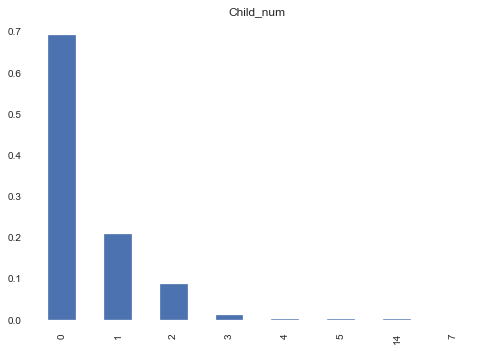

In [53]:
df['child_num'].value_counts(normalize=True).plot.bar(title= 'Child_num')

#### Income_type 분석



In [95]:
df['income_type'].value_counts()

Working                 6766
Commercial associate    3108
Pensioner               2249
State servant           1103
Student                    2
Name: income_type, dtype: int64

In [96]:
df['income_type'].value_counts(normalize=True) * 100

Working                 51.149078
Commercial associate    23.495615
Pensioner               17.001814
State servant            8.338373
Student                  0.015119
Name: income_type, dtype: float64

<AxesSubplot:title={'center':'income_type'}>

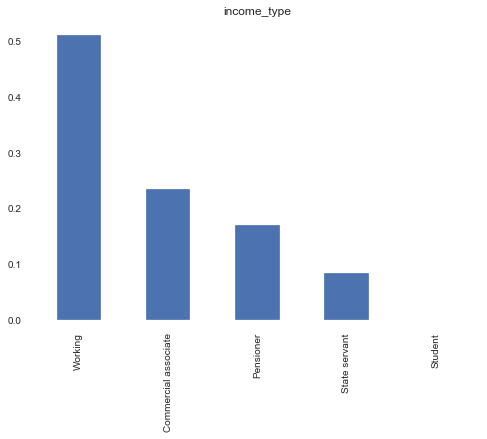

In [106]:
df['income_type'].value_counts(normalize=True).plot.bar(title= 'income_type')

#### Edu_type 분석



In [98]:
df['edu_type'].value_counts()

Secondary / secondary special    8972
Higher education                 3626
Incomplete higher                 499
Lower secondary                   118
Academic degree                    13
Name: edu_type, dtype: int64

In [99]:
df['edu_type'].value_counts(normalize=True) * 100

Secondary / secondary special    67.825824
Higher education                 27.411551
Incomplete higher                 3.772301
Lower secondary                   0.892047
Academic degree                   0.098276
Name: edu_type, dtype: float64

<AxesSubplot:title={'center':'edu_type'}>

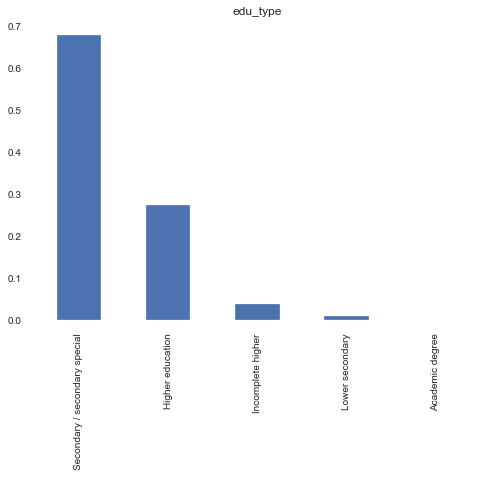

In [105]:
df['edu_type'].value_counts(normalize=True).plot.bar(title= 'edu_type')

#### family_type 분석

In [101]:
df['family_type'].value_counts()

Married                 9068
Single / not married    1770
Civil marriage          1041
Separated                771
Widow                    578
Name: family_type, dtype: int64

In [102]:
df['family_type'].value_counts(normalize=True) * 100

Married                 68.551557
Single / not married    13.380708
Civil marriage           7.869670
Separated                5.828546
Widow                    4.369519
Name: family_type, dtype: float64

<AxesSubplot:title={'center':'family_type'}>

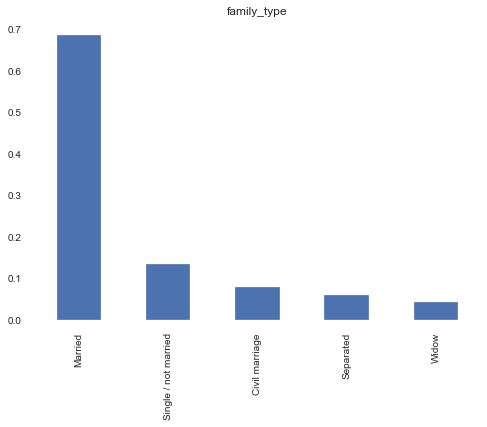

In [104]:
df['family_type'].value_counts(normalize=True).plot.bar(title= 'family_type')

#### house_type 분석

In [107]:
df['house_type'].value_counts()

House / apartment      11820
With parents             628
Municipal apartment      413
Rented apartment         215
Office apartment          93
Co-op apartment           59
Name: house_type, dtype: int64

In [108]:
df['house_type'].value_counts(normalize=True) * 100

House / apartment      89.355912
With parents            4.747505
Municipal apartment     3.122165
Rented apartment        1.625340
Office apartment        0.703054
Co-op apartment         0.446024
Name: house_type, dtype: float64

<AxesSubplot:title={'center':'house_type'}>

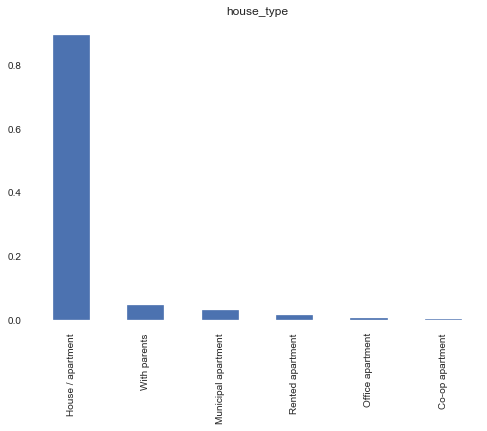

In [109]:
df['house_type'].value_counts(normalize=True).plot.bar(title= 'house_type')

#### work_phone 분석

In [110]:
df['work_phone'].value_counts()

0    10182
1     3046
Name: work_phone, dtype: int64

In [111]:
df['work_phone'].value_counts(normalize=True) * 100

0    76.973087
1    23.026913
Name: work_phone, dtype: float64

<AxesSubplot:title={'center':'work_phone'}>

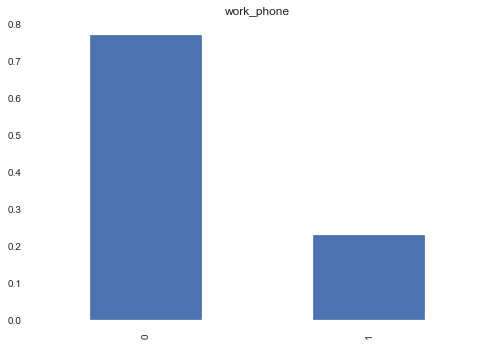

In [112]:
df['work_phone'].value_counts(normalize=True).plot.bar(title= 'work_phone')

#### phone 분석

In [113]:
df['phone'].value_counts()

0    9300
1    3928
Name: phone, dtype: int64

In [114]:
df['phone'].value_counts(normalize=True) * 100

0    70.305413
1    29.694587
Name: phone, dtype: float64

<AxesSubplot:title={'center':'phone'}>

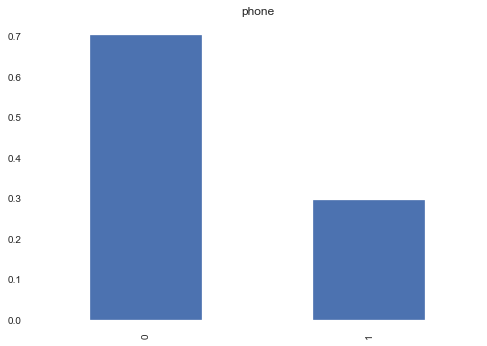

In [115]:
df['phone'].value_counts(normalize=True).plot.bar(title= 'phone')

#### email 분석

In [116]:
df['email'].value_counts()

0    12044
1     1184
Name: email, dtype: int64

In [117]:
df['email'].value_counts(normalize=True) * 100

0    91.049289
1     8.950711
Name: email, dtype: float64

<AxesSubplot:title={'center':'email'}>

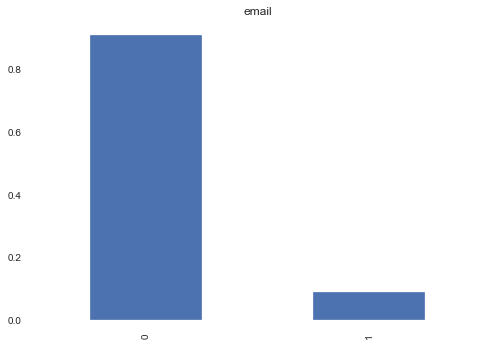

In [119]:
df['email'].value_counts(normalize=True).plot.bar(title= 'email')

#### occyp_type 분석

분석 결과 신기하게도 직업을 가지고 있지 않은 인원이 많았는데, 표기를 하지 않은 것인지 진짜 직업이 없는 것인지 알아야할 것 같음

In [120]:
df['occyp_type'].value_counts()

None                     4132
Laborers                 2260
Core staff               1337
Sales staff              1256
Managers                 1061
Drivers                   791
High skill tech staff     521
Accountants               445
Medicine staff            420
Security staff            226
Cooking staff             214
Cleaning staff            198
Private service staff     115
Low-skill Laborers         63
Waiters/barmen staff       53
Secretaries                48
HR staff                   35
Realty agents              33
IT staff                   20
Name: occyp_type, dtype: int64

In [121]:
df['occyp_type'].value_counts(normalize=True) * 100

None                     31.236770
Laborers                 17.084971
Core staff               10.107348
Sales staff               9.495011
Managers                  8.020865
Drivers                   5.979740
High skill tech staff     3.938615
Accountants               3.364076
Medicine staff            3.175083
Security staff            1.708497
Cooking staff             1.617780
Cleaning staff            1.496825
Private service staff     0.869368
Low-skill Laborers        0.476262
Waiters/barmen staff      0.400665
Secretaries               0.362867
HR staff                  0.264590
Realty agents             0.249471
IT staff                  0.151194
Name: occyp_type, dtype: float64

<AxesSubplot:title={'center':'occyp_type'}>

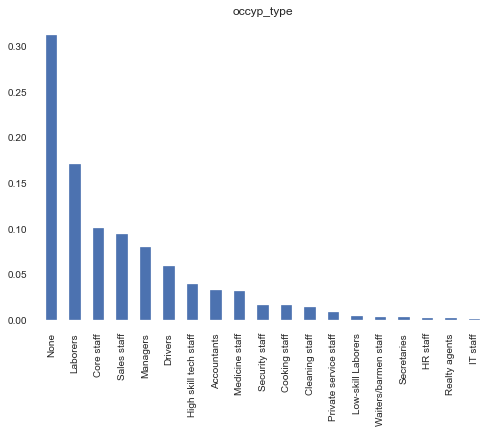

In [122]:
df['occyp_type'].value_counts(normalize=True).plot.bar(title= 'occyp_type')

### 2. 학습데이터 (numerical)

#### income_total 분석

In [78]:
df['income_total'].max(axis= 0)

1575000.0

In [58]:
df['income_total'].value_counts()

135000.0    1578
157500.0    1123
225000.0    1114
112500.0    1100
180000.0    1058
            ... 
69750.0        1
161100.0       1
178200.0       1
171261.0       1
36000.0        1
Name: income_total, Length: 216, dtype: int64

In [59]:
df['income_total'].value_counts(normalize=True) * 100

135000.0    11.929241
157500.0     8.489568
225000.0     8.421530
112500.0     8.315694
180000.0     7.998186
              ...    
69750.0      0.007560
161100.0     0.007560
178200.0     0.007560
171261.0     0.007560
36000.0      0.007560
Name: income_total, Length: 216, dtype: float64

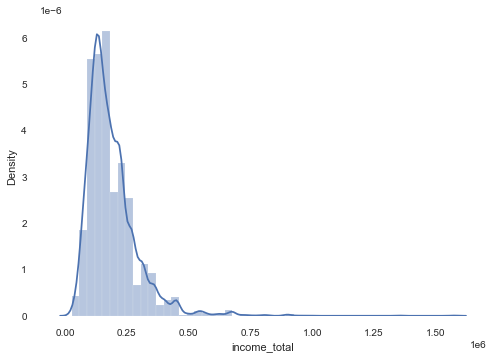

In [81]:
sns.distplot(df["income_total"]);

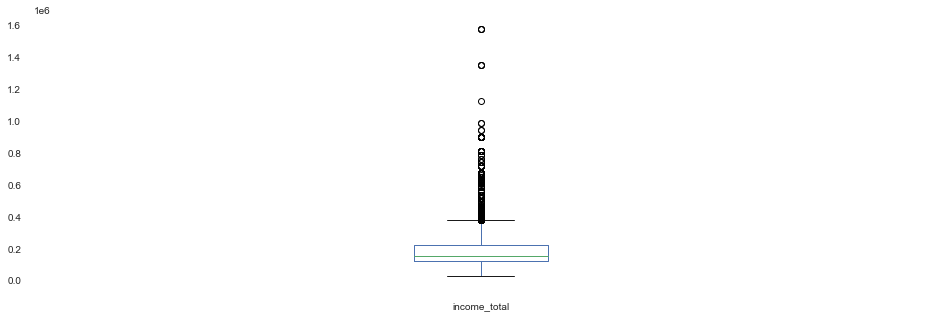

In [77]:
df["income_total"].plot.box(figsize=(16,5))
plt.show()

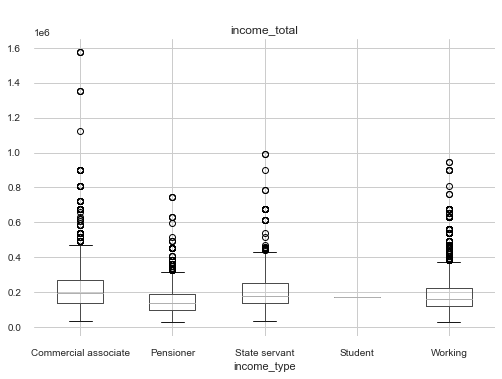

In [123]:
df.boxplot(column='income_total', by='income_type')
plt.suptitle(" ")
plt.show()

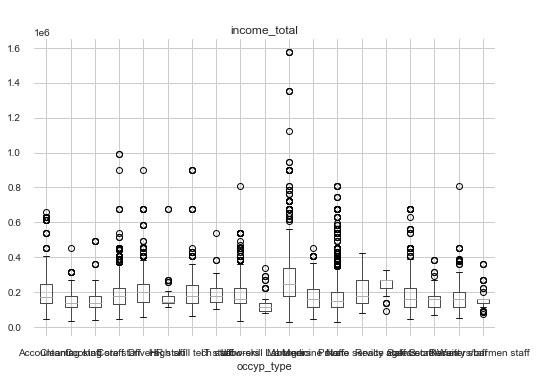

In [135]:
df.boxplot(column='income_total', by='occyp_type')
plt.suptitle(" ")
plt.show()

<AxesSubplot:>

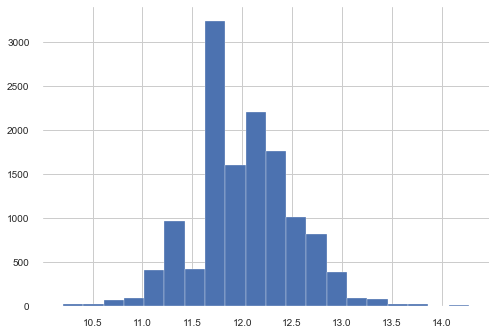

In [177]:
df['income_total'] = np.log(df['income_total'])
df['income_total'].hist(bins=20)

<AxesSubplot:xlabel='income_total', ylabel='Density'>

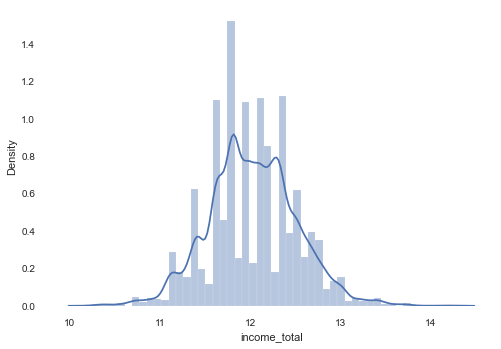

In [178]:
sns.distplot(df["income_total"])

#### day_birth 분석

In [193]:
df['DAYS_BIRTH'].value_counts()

-15519    21
-15140    16
-12676    16
-16768    15
-16896    15
          ..
-21472     1
-13276     1
-19428     1
-21481     1
-12286     1
Name: DAYS_BIRTH, Length: 5262, dtype: int64

In [139]:
df['DAYS_BIRTH'].value_counts(normalize=True) * 100

-15519    0.158754
-15140    0.120956
-12676    0.120956
-16768    0.113396
-16896    0.113396
            ...   
-21472    0.007560
-13276    0.007560
-19428    0.007560
-21481    0.007560
-12286    0.007560
Name: DAYS_BIRTH, Length: 5262, dtype: float64

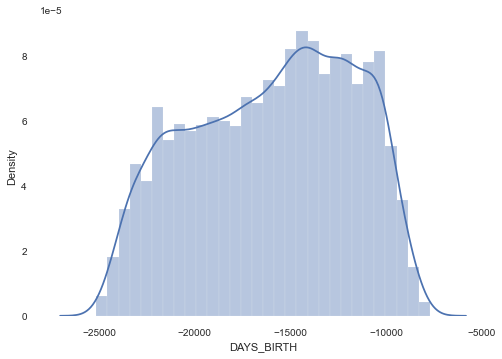

In [140]:
sns.distplot(df["DAYS_BIRTH"]);

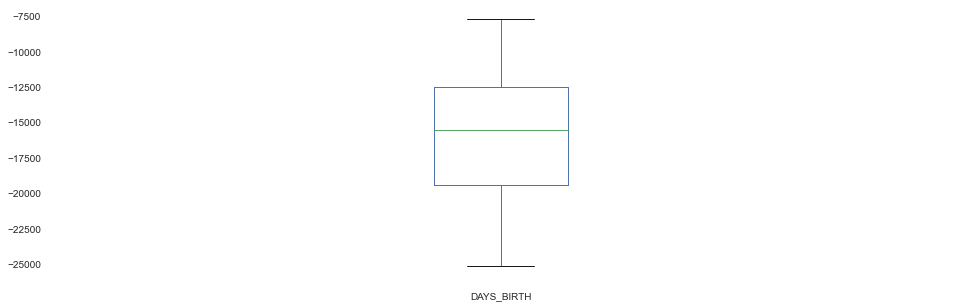

In [141]:
df["DAYS_BIRTH"].plot.box(figsize=(16,5))
plt.show()

#### DAYS_EMPLOYED  분석

In [205]:
df['DAYS_EMPLOYED'].value_counts()

 365243    2247
-401         29
-200         24
-1539        23
-309         23
           ... 
-4245         1
-159          1
-1876         1
-2216         1
-4090         1
Name: DAYS_EMPLOYED, Length: 2947, dtype: int64

In [206]:
df.loc[df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

In [207]:
df['DAYS_EMPLOYED'].value_counts()

 0       2247
-401       29
-200       24
-2087      23
-1539      23
         ... 
-348        1
-332        1
-6425       1
-2307       1
-4090       1
Name: DAYS_EMPLOYED, Length: 2947, dtype: int64

In [208]:
df['DAYS_EMPLOYED'].value_counts(normalize=True) * 100

 0       16.986695
-401      0.219232
-200      0.181433
-2087     0.173874
-1539     0.173874
           ...    
-348      0.007560
-332      0.007560
-6425     0.007560
-2307     0.007560
-4090     0.007560
Name: DAYS_EMPLOYED, Length: 2947, dtype: float64

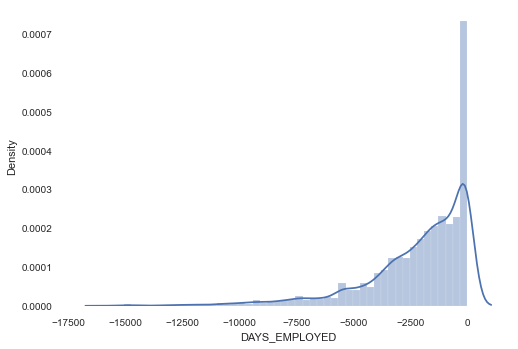

In [209]:
sns.distplot(df["DAYS_EMPLOYED"]);

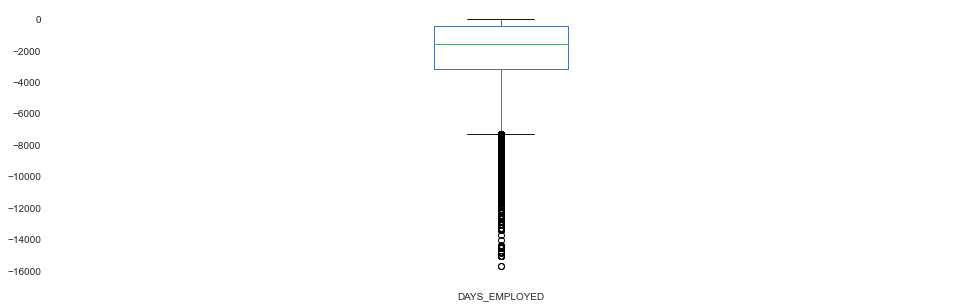

In [199]:
df["DAYS_EMPLOYED"].plot.box(figsize=(16,5))
plt.show()

#### begin_month 분석

In [146]:
df['begin_month'].value_counts()

-7     342
-3     324
-8     315
-6     305
-17    294
      ... 
-59    121
-58    118
-60    117
-57    111
 0     102
Name: begin_month, Length: 61, dtype: int64

In [147]:
df['begin_month'].value_counts(normalize=True) * 100

-7     2.585425
-3     2.449350
-8     2.381312
-6     2.305715
-17    2.222558
         ...   
-59    0.914726
-58    0.892047
-60    0.884487
-57    0.839129
 0     0.771092
Name: begin_month, Length: 61, dtype: float64

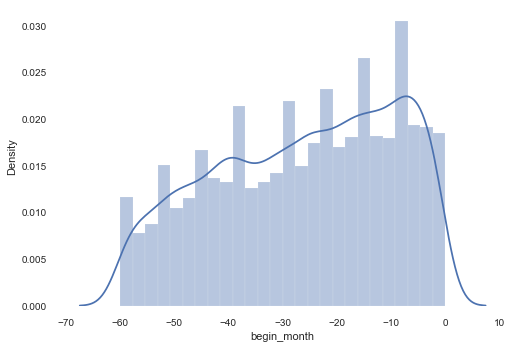

In [148]:
sns.distplot(df["begin_month"]);

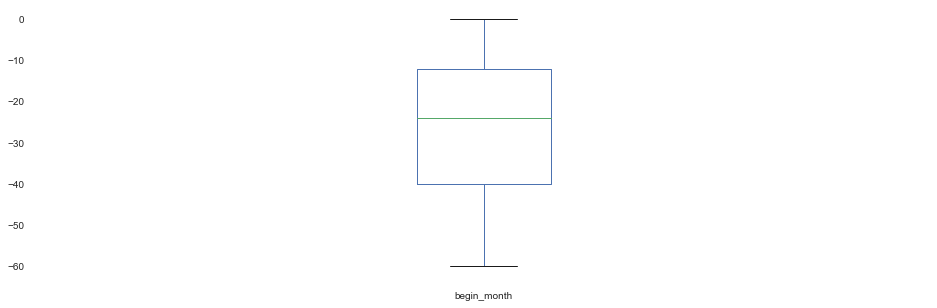

In [149]:
df["begin_month"].plot.box(figsize=(16,5))
plt.show()

### Categorical variable과 Target variable에 대한 관계

#### 1. Gender 와 Credit 간의 관계

credit     0     1
gender            
F       1069  7726
M        542  3891


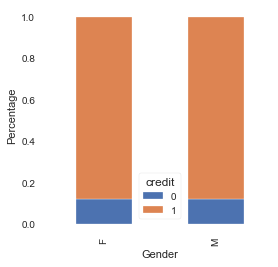

In [154]:
print(pd.crosstab(df["gender"],df["credit"]))
Gender = pd.crosstab(df["gender"],df["credit"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

#### 2. Car 와 Credit 간의 관계

credit     0     1
car               
N       1012  7239
Y        599  4378


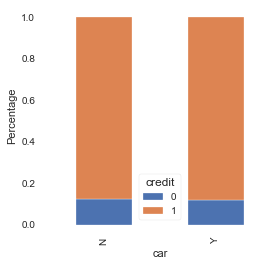

In [155]:
print(pd.crosstab(df["car"],df["credit"]))
Car = pd.crosstab(df["car"],df["credit"])
Car.div(Car.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("car")
plt.ylabel("Percentage")
plt.show()

#### 3. Reality 와 Credit 간의 관계

credit      0     1
reality            
N         517  3888
Y        1094  7729


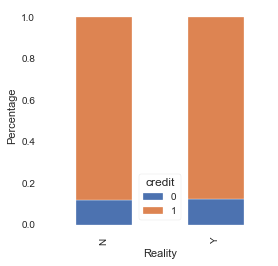

In [156]:
print(pd.crosstab(df["reality"],df["credit"]))
Reality = pd.crosstab(df["reality"],df["credit"])
Reality.div(Reality.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Reality")
plt.ylabel("Percentage")
plt.show()

#### 4. child_num 와 Credit 간의 관계

credit        0     1
child_num            
0          1100  8044
1           363  2388
2           128  1022
3            16   132
4             3    24
5             1     4
7             0     1
14            0     2


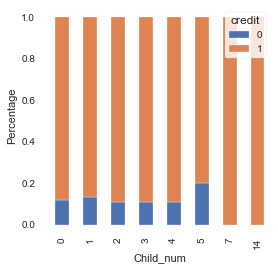

In [157]:
print(pd.crosstab(df["child_num"],df["credit"]))
Child_num = pd.crosstab(df["child_num"],df["credit"])
Child_num.div(Child_num.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Child_num")
plt.ylabel("Percentage")
plt.show()

#### 5. income_type 와 Credit 간의 관계

credit                  0     1
income_type                    
Commercial associate  376  2732
Pensioner             279  1970
State servant         136   967
Student                 0     2
Working               820  5946


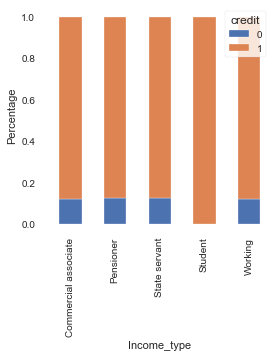

In [158]:
print(pd.crosstab(df["income_type"],df["credit"]))
Income_type = pd.crosstab(df["income_type"],df["credit"])
Income_type.div(Income_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Income_type")
plt.ylabel("Percentage")
plt.show()

#### 6. edu_type 와 Credit 간의 관계

credit                            0     1
edu_type                                 
Academic degree                   1    12
Higher education                438  3188
Incomplete higher                59   440
Lower secondary                  13   105
Secondary / secondary special  1100  7872


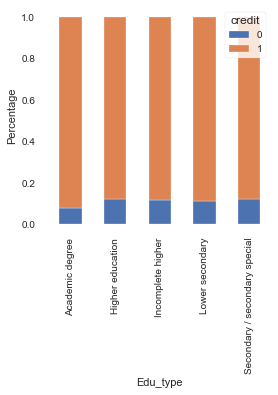

In [159]:
print(pd.crosstab(df["edu_type"],df["credit"]))
Edu_type = pd.crosstab(df["edu_type"],df["credit"])
Edu_type.div(Edu_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Edu_type")
plt.ylabel("Percentage")
plt.show()

#### 7. family_type 와 Credit 간의 관계

credit                   0     1
family_type                     
Civil marriage         143   898
Married               1104  7964
Separated               96   675
Single / not married   203  1567
Widow                   65   513


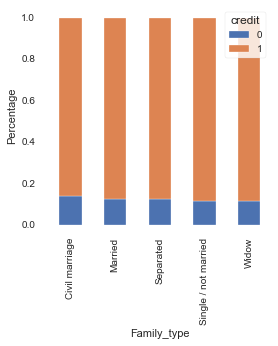

In [160]:
print(pd.crosstab(df["family_type"],df["credit"]))
Family_type = pd.crosstab(df["family_type"],df["credit"])
Family_type.div(Family_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Family_type")
plt.ylabel("Percentage")
plt.show()

#### 8. house_type 와 Credit 간의 관계

credit                  0      1
house_type                      
Co-op apartment         6     53
House / apartment    1438  10382
Municipal apartment    60    353
Office apartment       11     82
Rented apartment       28    187
With parents           68    560


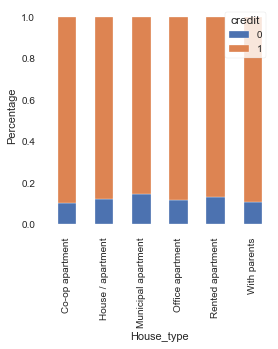

In [161]:
print(pd.crosstab(df["house_type"],df["credit"]))
House_type = pd.crosstab(df["house_type"],df["credit"])
House_type.div(House_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("House_type")
plt.ylabel("Percentage")
plt.show()

#### 9. work_phone 와 Credit 간의 관계

credit         0     1
work_phone            
0           1233  8949
1            378  2668


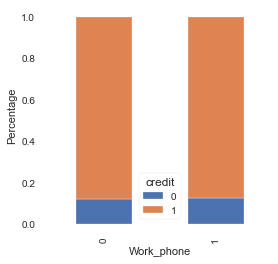

In [162]:
print(pd.crosstab(df["work_phone"],df["credit"]))
Work_phone = pd.crosstab(df["work_phone"],df["credit"])
Work_phone.div(Work_phone.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Work_phone")
plt.ylabel("Percentage")
plt.show()

#### 10. phone 와 Credit 간의 관계

credit     0     1
phone             
0       1131  8169
1        480  3448


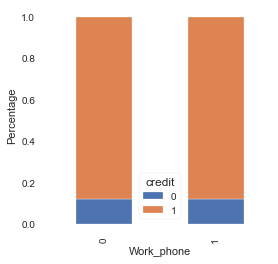

In [163]:
print(pd.crosstab(df["phone"],df["credit"]))
Phone = pd.crosstab(df["phone"],df["credit"])
Phone.div(Phone.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Work_phone")
plt.ylabel("Percentage")
plt.show()

#### 11. occyp_type 와 Credit 간의 관계

credit                   0     1
occyp_type                      
Accountants             59   386
Cleaning staff          21   177
Cooking staff           34   180
Core staff             175  1162
Drivers                100   691
HR staff                 3    32
High skill tech staff   52   469
IT staff                 2    18
Laborers               296  1964
Low-skill Laborers      13    50
Managers               122   939
Medicine staff          34   386
None                   491  3641
Private service staff   19    96
Realty agents            6    27
Sales staff            148  1108
Secretaries              5    43
Security staff          23   203
Waiters/barmen staff     8    45


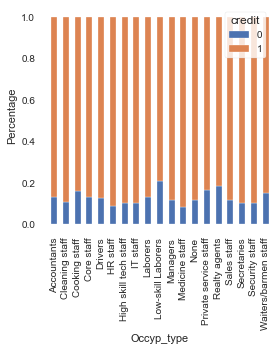

In [164]:
print(pd.crosstab(df["occyp_type"],df["credit"]))
Occyp_type = pd.crosstab(df["occyp_type"],df["credit"])
Occyp_type.div(Occyp_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Occyp_type")
plt.ylabel("Percentage")
plt.show()

### Numerical variable과 Target variable에 대한 관계

<AxesSubplot:xlabel='credit'>

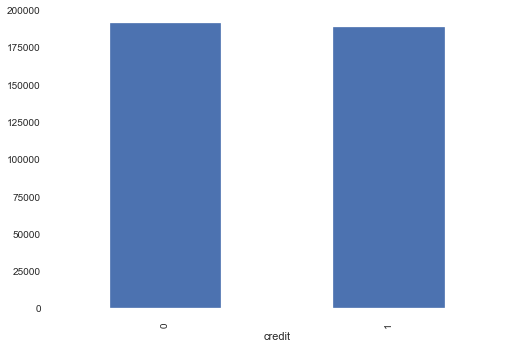

In [165]:
df.groupby("credit")['income_total'].mean().plot.bar()

#### DAYS_EMPLOYED vs credit

In [171]:
bins=[-15713,-3153,-1539, -401.75,365243]
group=['Low','Q1','Median', 'Q3']
df['Employed_bin']=pd.cut(df['DAYS_EMPLOYED'],bins,labels=group)

credit          0     1
Employed_bin           
Low           395  2915
Q1            380  2943
Median        400  2887
Q3            436  2871


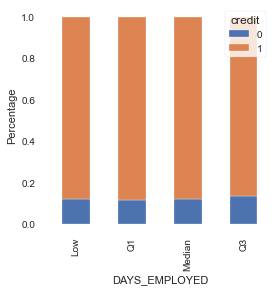

In [172]:
print(pd.crosstab(df["Employed_bin"],df["credit"]))
Income_bin = pd.crosstab(df["Employed_bin"], df["credit"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("Percentage")
plt.show()

#### income_total vs credit

In [173]:
bins=[0,121500,157500,225000,1575000]
group=['Low','Q1','Median', 'Q3']
df['Income_bin']=pd.cut(df['income_total'],bins,labels=group)

credit        0     1
Income_bin           
Low         389  2986
Q1          394  2902
Median      450  3222
Q3          378  2507


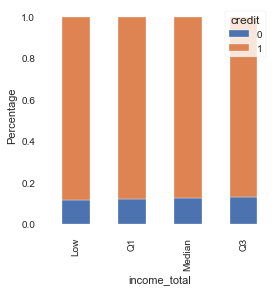

In [174]:
print(pd.crosstab(df["Income_bin"],df["credit"]))
Income_bin = pd.crosstab(df["Income_bin"], df["credit"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("income_total")
plt.ylabel("Percentage")
plt.show()

#### begin_month vs credit

In [175]:
bins=[-60,-40,-24,-12,0]
group=['Low','Q1','Median', 'Q3']
df['begin_month_bin']=pd.cut(df['begin_month'],bins,labels=group)

credit             0     1
begin_month_bin           
Low              351  2859
Q1               401  3136
Median           387  2755
Q3               463  2759


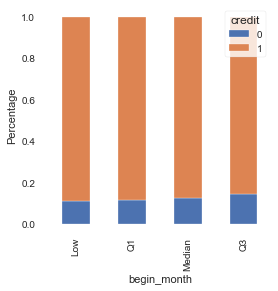

In [176]:
print(pd.crosstab(df["begin_month_bin"],df["credit"]))
Income_bin = pd.crosstab(df["begin_month_bin"], df["credit"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("begin_month")
plt.ylabel("Percentage")
plt.show()

## 전처리된 데이터

1. occyp_type null값 None 변경 
2. FLAG_MOBIL 열 삭제
3. 새로운 column ID 생성 
4. income_total 로그 스케일링
5. 음수 데이터 양수 변환
6. DAYS_EMPLOYED 365243 -> 0 값 변경
7. DAYS_EMPLOYED 스케일링
8. phone column 삭제
9. family_num, child_num 둘중하나 삭제
10. MinMaxScaler

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from category_encoders.ordinal import OrdinalEncoder
from minisom import MiniSom
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = pd.read_csv("data/train/train.csv")
X = X.drop(columns=['index'])
X.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0      202500.0   Pensioner   
1      F   N       N          1      157500.0     Working   
2      M   Y       N          0      135000.0     Working   
3      F   Y       N          2      112500.0     Working   
4      M   Y       Y          1      225000.0     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment      -19031   
1               Higher education     Married  House / apartment      -15773   
2  Secondary / secondary special     Married  House / apartment      -13483   
3  Secondary / secondary special     Married  House / apartment      -12270   
4  Secondary / secondary special     Married  House / apartment      -16175   

   DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email      occyp_type  \
0         365243           1           0      0      0             NaN   
1           -309           1           0      1      0     Sales staff   
2          -1816           1           1      1      0        Laborers   
3           -150           1           0      1      0  Security staff   
4          -2371           1           0      0      0         Drivers   

   family_size  begin_month  
0            2          -53  
1            3          -26  
2            2           -9  
3            4          -12  
4            3           -3

In [3]:
y = pd.read_csv("data/train/train_label.csv")
y = y.drop(columns=['index'])

df = pd.concat([X,y], axis =1)
df.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0      202500.0   Pensioner   
1      F   N       N          1      157500.0     Working   
2      M   Y       N          0      135000.0     Working   
3      F   Y       N          2      112500.0     Working   
4      M   Y       Y          1      225000.0     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment      -19031   
1               Higher education     Married  House / apartment      -15773   
2  Secondary / secondary special     Married  House / apartment      -13483   
3  Secondary / secondary special     Married  House / apartment      -12270   
4  Secondary / secondary special     Married  House / apartment      -16175   

   DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email      occyp_type  \
0         365243           1           0      0      0             NaN   
1           -309           1           0      1      0     Sales staff   
2          -1816           1           1      1      0        Laborers   
3           -150           1           0      1      0  Security staff   
4          -2371           1           0      0      0         Drivers   

   family_size  begin_month  credit  
0            2          -53       1  
1            3          -26       0  
2            2           -9       1  
3            4          -12       1  
4            3           -3       1

#### 1. occyp_type null값 None 변경 

In [4]:
df = df.fillna('None')
df.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0      202500.0   Pensioner   
1      F   N       N          1      157500.0     Working   
2      M   Y       N          0      135000.0     Working   
3      F   Y       N          2      112500.0     Working   
4      M   Y       Y          1      225000.0     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment      -19031   
1               Higher education     Married  House / apartment      -15773   
2  Secondary / secondary special     Married  House / apartment      -13483   
3  Secondary / secondary special     Married  House / apartment      -12270   
4  Secondary / secondary special     Married  House / apartment      -16175   

   DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email      occyp_type  \
0         365243           1           0      0      0            None   
1           -309           1           0      1      0     Sales staff   
2          -1816           1           1      1      0        Laborers   
3           -150           1           0      1      0  Security staff   
4          -2371           1           0      0      0         Drivers   

   family_size  begin_month  credit  
0            2          -53       1  
1            3          -26       0  
2            2           -9       1  
3            4          -12       1  
4            3           -3       1

#### 2. FLAG_MOBIL 열 삭제


In [5]:
df = df.drop(columns=['FLAG_MOBIL'])

##### 3. ID 생성: 각 컬럼의 값들을 더해서 고유한 사람을 파악(*한 사람이 여러 개 카드를 만들 가능성을 고려해 begin_month는 제외함)

In [6]:
df['ID'] = \
df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

#### 4. income_total 로그 스케일링

<AxesSubplot:>

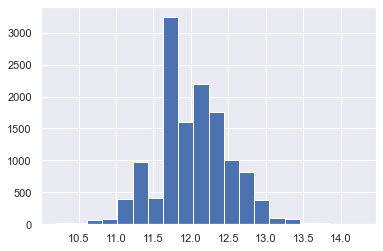

In [7]:
df['income_total'] = np.log(df['income_total'])
df['income_total'].hist(bins=20)


#### 5. 음수 데이터 양수 변환

In [8]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] * -1
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * -1
df['begin_month'] = df['begin_month'] * -1
df.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0     12.218495   Pensioner   
1      F   N       N          1     11.967181     Working   
2      M   Y       N          0     11.813030     Working   
3      F   Y       N          2     11.630709     Working   
4      M   Y       Y          1     12.323856     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment       19031   
1               Higher education     Married  House / apartment       15773   
2  Secondary / secondary special     Married  House / apartment       13483   
3  Secondary / secondary special     Married  House / apartment       12270   
4  Secondary / secondary special     Married  House / apartment       16175   

   DAYS_EMPLOYED  work_phone  phone  email      occyp_type  family_size  \
0        -365243           0      0      0            None            2   
1            309           0      1      0     Sales staff            3   
2           1816           1      1      0        Laborers            2   
3            150           0      1      0  Security staff            4   
4           2371           0      0      0         Drivers            3   

   begin_month  credit                                                 ID  
0           53       1  0_202500.0_-19031_365243_0_0_0_2_F_Y_Y_Pension...  
1           26       0  1_157500.0_-15773_-309_0_1_0_3_F_N_N_Working_H...  
2            9       1  0_135000.0_-13483_-1816_1_1_0_2_M_Y_N_Working_...  
3           12       1  2_112500.0_-12270_-150_0_1_0_4_F_Y_N_Working_S...  
4            3       1  1_225000.0_-16175_-2371_0_0_0_3_M_Y_Y_Working_...

In [9]:
df[['DAYS_EMPLOYED', 'DAYS_BIRTH', 'begin_month']]

DAYS_EMPLOYED  DAYS_BIRTH  begin_month
0            -365243       19031           53
1                309       15773           26
2               1816       13483            9
3                150       12270           12
4               2371       16175            3
...              ...         ...          ...
13223           5637       20657           43
13224           3482       18409           53
13225           7827       14625           34
13226           2326       10676           16
13227           1621       11925            4

[13228 rows x 3 columns]

#### 6. DAYS_EMPLOYED -365243(원래는 양수값) -> 0 값 변경

In [10]:
df.loc[df['DAYS_EMPLOYED'] == -365243]['DAYS_EMPLOYED']

0       -365243
6       -365243
7       -365243
12      -365243
14      -365243
          ...  
13191   -365243
13193   -365243
13195   -365243
13207   -365243
13221   -365243
Name: DAYS_EMPLOYED, Length: 2247, dtype: int64

In [11]:
df.loc[df['DAYS_EMPLOYED'] == -365243, 'DAYS_EMPLOYED'] = 0

In [12]:
df.loc[df['DAYS_EMPLOYED'] == 0]['DAYS_EMPLOYED']

0        0
6        0
7        0
12       0
14       0
        ..
13191    0
13193    0
13195    0
13207    0
13221    0
Name: DAYS_EMPLOYED, Length: 2247, dtype: int64

#### 7. DAYS_EMPLOYED 스케일링

<AxesSubplot:>

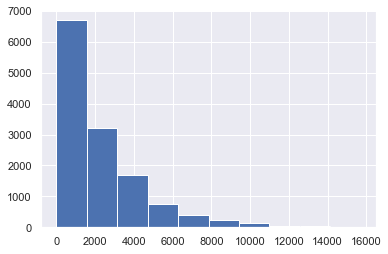

In [13]:
df['DAYS_EMPLOYED'].hist()

<AxesSubplot:>

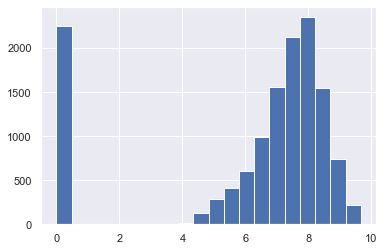

In [14]:
df['DAYS_EMPLOYED'] = np.log1p(df['DAYS_EMPLOYED'])
df['DAYS_EMPLOYED'].hist(bins=20)

#### 8. phone column 삭제 (상관관계가 가장 낮음)

In [15]:
df = df.drop(columns=['phone'])

In [16]:
df.head()

gender car reality  child_num  income_total income_type  \
0      F   Y       Y          0     12.218495   Pensioner   
1      F   N       N          1     11.967181     Working   
2      M   Y       N          0     11.813030     Working   
3      F   Y       N          2     11.630709     Working   
4      M   Y       Y          1     12.323856     Working   

                        edu_type family_type         house_type  DAYS_BIRTH  \
0  Secondary / secondary special     Married  House / apartment       19031   
1               Higher education     Married  House / apartment       15773   
2  Secondary / secondary special     Married  House / apartment       13483   
3  Secondary / secondary special     Married  House / apartment       12270   
4  Secondary / secondary special     Married  House / apartment       16175   

   DAYS_EMPLOYED  work_phone  email      occyp_type  family_size  begin_month  \
0       0.000000           0      0            None            2           53   
1       5.736572           0      0     Sales staff            3           26   
2       7.504942           1      0        Laborers            2            9   
3       5.017280           0      0  Security staff            4           12   
4       7.771489           0      0         Drivers            3            3   

   credit                                                 ID  
0       1  0_202500.0_-19031_365243_0_0_0_2_F_Y_Y_Pension...  
1       0  1_157500.0_-15773_-309_0_1_0_3_F_N_N_Working_H...  
2       1  0_135000.0_-13483_-1816_1_1_0_2_M_Y_N_Working_...  
3       1  2_112500.0_-12270_-150_0_1_0_4_F_Y_N_Working_S...  
4       1  1_225000.0_-16175_-2371_0_0_0_3_M_Y_Y_Working_...

#### 9. family_size, child_num  상관관계가 높으므로 child_num은 family_size에 포함된 개념으로 생각하여 삭제

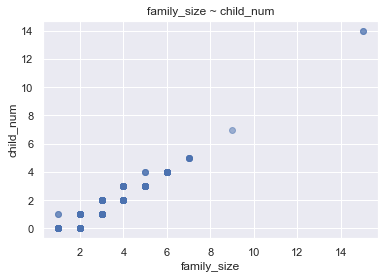

In [17]:
X = df['family_size'].values
Y = df['child_num'].values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('family_size ~ child_num')
plt.xlabel('family_size')
plt.ylabel('child_num')
plt.show()

In [18]:
df = df.drop(columns=['child_num'])

In [19]:
df.head()

gender car reality  income_total income_type                       edu_type  \
0      F   Y       Y     12.218495   Pensioner  Secondary / secondary special   
1      F   N       N     11.967181     Working               Higher education   
2      M   Y       N     11.813030     Working  Secondary / secondary special   
3      F   Y       N     11.630709     Working  Secondary / secondary special   
4      M   Y       Y     12.323856     Working  Secondary / secondary special   

  family_type         house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  \
0     Married  House / apartment       19031       0.000000           0   
1     Married  House / apartment       15773       5.736572           0   
2     Married  House / apartment       13483       7.504942           1   
3     Married  House / apartment       12270       5.017280           0   
4     Married  House / apartment       16175       7.771489           0   

   email      occyp_type  family_size  begin_month  credit  \
0      0            None            2           53       1   
1      0     Sales staff            3           26       0   
2      0        Laborers            2            9       1   
3      0  Security staff            4           12       1   
4      0         Drivers            3            3       1   

                                                  ID  
0  0_202500.0_-19031_365243_0_0_0_2_F_Y_Y_Pension...  
1  1_157500.0_-15773_-309_0_1_0_3_F_N_N_Working_H...  
2  0_135000.0_-13483_-1816_1_1_0_2_M_Y_N_Working_...  
3  2_112500.0_-12270_-150_0_1_0_4_F_Y_N_Working_S...  
4  1_225000.0_-16175_-2371_0_0_0_3_M_Y_Y_Working_...

#### 10. categorical data에 대한 one hot incoding

In [20]:
df[['gender', 'car', 'reality']]

gender car reality
0          F   Y       Y
1          F   N       N
2          M   Y       N
3          F   Y       N
4          M   Y       Y
...      ...  ..     ...
13223      F   N       N
13224      F   Y       Y
13225      F   N       Y
13226      M   N       Y
13227      F   Y       Y

[13228 rows x 3 columns]

In [21]:
df.loc[df['gender'] == 'F', 'gender'] = 0
df.loc[df['gender'] == 'M', 'gender'] = 1
df.head()

gender car reality  income_total income_type                       edu_type  \
0      0   Y       Y     12.218495   Pensioner  Secondary / secondary special   
1      0   N       N     11.967181     Working               Higher education   
2      1   Y       N     11.813030     Working  Secondary / secondary special   
3      0   Y       N     11.630709     Working  Secondary / secondary special   
4      1   Y       Y     12.323856     Working  Secondary / secondary special   

  family_type         house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  \
0     Married  House / apartment       19031       0.000000           0   
1     Married  House / apartment       15773       5.736572           0   
2     Married  House / apartment       13483       7.504942           1   
3     Married  House / apartment       12270       5.017280           0   
4     Married  House / apartment       16175       7.771489           0   

   email      occyp_type  family_size  begin_month  credit  \
0      0            None            2           53       1   
1      0     Sales staff            3           26       0   
2      0        Laborers            2            9       1   
3      0  Security staff            4           12       1   
4      0         Drivers            3            3       1   

                                                  ID  
0  0_202500.0_-19031_365243_0_0_0_2_F_Y_Y_Pension...  
1  1_157500.0_-15773_-309_0_1_0_3_F_N_N_Working_H...  
2  0_135000.0_-13483_-1816_1_1_0_2_M_Y_N_Working_...  
3  2_112500.0_-12270_-150_0_1_0_4_F_Y_N_Working_S...  
4  1_225000.0_-16175_-2371_0_0_0_3_M_Y_Y_Working_...

In [22]:
df.loc[df['car'] == 'Y', 'car'] = 1
df.loc[df['car'] == 'N', 'car'] = 0
df.head()

gender car reality  income_total income_type                       edu_type  \
0      0   1       Y     12.218495   Pensioner  Secondary / secondary special   
1      0   0       N     11.967181     Working               Higher education   
2      1   1       N     11.813030     Working  Secondary / secondary special   
3      0   1       N     11.630709     Working  Secondary / secondary special   
4      1   1       Y     12.323856     Working  Secondary / secondary special   

  family_type         house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  \
0     Married  House / apartment       19031       0.000000           0   
1     Married  House / apartment       15773       5.736572           0   
2     Married  House / apartment       13483       7.504942           1   
3     Married  House / apartment       12270       5.017280           0   
4     Married  House / apartment       16175       7.771489           0   

   email      occyp_type  family_size  begin_month  credit  \
0      0            None            2           53       1   
1      0     Sales staff            3           26       0   
2      0        Laborers            2            9       1   
3      0  Security staff            4           12       1   
4      0         Drivers            3            3       1   

                                                  ID  
0  0_202500.0_-19031_365243_0_0_0_2_F_Y_Y_Pension...  
1  1_157500.0_-15773_-309_0_1_0_3_F_N_N_Working_H...  
2  0_135000.0_-13483_-1816_1_1_0_2_M_Y_N_Working_...  
3  2_112500.0_-12270_-150_0_1_0_4_F_Y_N_Working_S...  
4  1_225000.0_-16175_-2371_0_0_0_3_M_Y_Y_Working_...

In [23]:
df.loc[df['reality'] == 'Y', 'reality'] = 1
df.loc[df['reality'] == 'N', 'reality'] = 0
df.head()

gender car reality  income_total income_type                       edu_type  \
0      0   1       1     12.218495   Pensioner  Secondary / secondary special   
1      0   0       0     11.967181     Working               Higher education   
2      1   1       0     11.813030     Working  Secondary / secondary special   
3      0   1       0     11.630709     Working  Secondary / secondary special   
4      1   1       1     12.323856     Working  Secondary / secondary special   

  family_type         house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  \
0     Married  House / apartment       19031       0.000000           0   
1     Married  House / apartment       15773       5.736572           0   
2     Married  House / apartment       13483       7.504942           1   
3     Married  House / apartment       12270       5.017280           0   
4     Married  House / apartment       16175       7.771489           0   

   email      occyp_type  family_size  begin_month  credit  \
0      0            None            2           53       1   
1      0     Sales staff            3           26       0   
2      0        Laborers            2            9       1   
3      0  Security staff            4           12       1   
4      0         Drivers            3            3       1   

                                                  ID  
0  0_202500.0_-19031_365243_0_0_0_2_F_Y_Y_Pension...  
1  1_157500.0_-15773_-309_0_1_0_3_F_N_N_Working_H...  
2  0_135000.0_-13483_-1816_1_1_0_2_M_Y_N_Working_...  
3  2_112500.0_-12270_-150_0_1_0_4_F_Y_N_Working_S...  
4  1_225000.0_-16175_-2371_0_0_0_3_M_Y_Y_Working_...

In [24]:
df[['gender', 'car', 'reality']]

gender car reality
0          0   1       1
1          0   0       0
2          1   1       0
3          0   1       0
4          1   1       1
...      ...  ..     ...
13223      0   0       0
13224      0   1       1
13225      0   0       1
13226      1   0       1
13227      0   1       1

[13228 rows x 3 columns]

#### 11. 범주가 많은 데이터에 대해서는 ordinary encoding

In [25]:
categorical_feats = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

In [26]:
encoder = OrdinalEncoder(categorical_feats)
df[categorical_feats] = encoder.fit_transform(df[categorical_feats], df['credit'])

df['ID'] = df['ID'].astype('int64')

In [27]:
df[['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']]

income_type  edu_type  family_type  house_type  occyp_type    ID
0                1         1            1           1           1     1
1                2         2            1           1           2     2
2                2         1            1           1           3     3
3                2         1            1           1           4     4
4                2         1            1           1           5     5
...            ...       ...          ...         ...         ...   ...
13223            2         1            4           1           9  4791
13224            3         2            1           1           2  1863
13225            2         1            5           1           1  6486
13226            3         1            1           1           3  1330
13227            2         2            1           1           1  6487

[13228 rows x 6 columns]

In [28]:
new_train_label = df["credit"]
new_train = df.drop(["credit"], axis=1)

#### scaling 전 새로운 data 저장

In [29]:
new_train_label.to_csv('new_train_label.csv', index=False)
new_train.to_csv('new_train.csv', index=False)

#### 12. MinMaxScaling

In [30]:
# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_train)

# df로 정리해서 확인
new_train_scaled = pd.DataFrame(normalized_data, columns= new_train.columns)
new_train_scaled.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0     0.0  1.0      1.0      0.495528         0.00      0.00          0.0   
1     0.0  0.0      0.0      0.433722         0.25      0.25          0.0   
2     1.0  1.0      0.0      0.395811         0.25      0.00          0.0   
3     0.0  1.0      0.0      0.350973         0.25      0.00          0.0   
4     1.0  1.0      1.0      0.521439         0.25      0.00          0.0   

   house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0         0.0    0.649166       0.000000         0.0    0.0    0.000000   
1         0.0    0.462429       0.593706         0.0    0.0    0.055556   
2         0.0    0.331174       0.776724         1.0    0.0    0.111111   
3         0.0    0.261650       0.519263         0.0    0.0    0.166667   
4         0.0    0.485470       0.804310         0.0    0.0    0.222222   

   family_size  begin_month        ID  
0     0.071429     0.883333  0.000000  
1     0.142857     0.433333  0.000154  
2     0.071429     0.150000  0.000308  
3     0.214286     0.200000  0.000463  
4     0.142857     0.050000  0.000617

#### Sclaing 후 새로운 데이터 저장

In [31]:
new_train_label.to_csv('new_train_label_scaled.csv', index=False)
new_train_scaled.to_csv('new_train_scaled.csv', index=False)

In [32]:
new_train_scaled

gender  car  reality  income_total  income_type  edu_type  family_type  \
0         0.0  1.0      1.0      0.495528         0.00      0.00         0.00   
1         0.0  0.0      0.0      0.433722         0.25      0.25         0.00   
2         1.0  1.0      0.0      0.395811         0.25      0.00         0.00   
3         0.0  1.0      0.0      0.350973         0.25      0.00         0.00   
4         1.0  1.0      1.0      0.521439         0.25      0.00         0.00   
...       ...  ...      ...           ...          ...       ...          ...   
13223     0.0  0.0      0.0      0.521439         0.25      0.00         0.75   
13224     0.0  1.0      1.0      0.585963         0.50      0.25         0.00   
13225     0.0  0.0      1.0      0.395811         0.25      0.00         1.00   
13226     1.0  0.0      1.0      0.433722         0.50      0.00         0.00   
13227     0.0  1.0      1.0      0.225345         0.25      0.25         0.00   

       house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0             0.0    0.649166       0.000000         0.0    0.0    0.000000   
1             0.0    0.462429       0.593706         0.0    0.0    0.055556   
2             0.0    0.331174       0.776724         1.0    0.0    0.111111   
3             0.0    0.261650       0.519263         0.0    0.0    0.166667   
4             0.0    0.485470       0.804310         0.0    0.0    0.222222   
...           ...         ...            ...         ...    ...         ...   
13223         0.0    0.742363       0.893915         0.0    0.0    0.444444   
13224         0.0    0.613515       0.844069         0.0    0.0    0.055556   
13225         0.0    0.396630       0.927880         0.0    1.0    0.000000   
13226         0.0    0.170287       0.802328         0.0    1.0    0.111111   
13227         0.0    0.241875       0.764974         0.0    0.0    0.000000   

       family_size  begin_month        ID  
0         0.071429     0.883333  0.000000  
1         0.142857     0.433333  0.000154  
2         0.071429     0.150000  0.000308  
3         0.214286     0.200000  0.000463  
4         0.142857     0.050000  0.000617  
...            ...          ...       ...  
13223     0.000000     0.716667  0.738514  
13224     0.071429     0.883333  0.287080  
13225     0.071429     0.566667  0.999846  
13226     0.142857     0.266667  0.204903  
13227     0.214286     0.066667  1.000000  

[13228 rows x 16 columns]

#### 13. K-Means clustering

In [33]:
from sklearn.cluster import KMeans

####  Elbow method
inertia 값은 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다. 이 값이 크게 변하지 않는 10을 k 값으로 선정하였다.

Initialization complete
Iteration 0, inertia 40593.82749954092.
Iteration 1, inertia 19643.726306385204.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 45799.10357065012.
Iteration 1, inertia 19643.726306385204.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 46266.579638847485.
Iteration 1, inertia 19643.726306385204.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 47340.09032432483.
Iteration 1, inertia 19643.726306385204.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 47370.32153685418.
Iteration 1, inertia 19643.726306385204.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 38392.22862232596.
Iteration 1, inertia 19643.726306385204.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 38592.612054431076.
Iteration 1, inertia 19643.7

Iteration 4, inertia 13027.276204362037
Iteration 5, inertia 12986.48222443533
Iteration 6, inertia 12986.130880413752
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 19859.57322663349
Iteration 1, inertia 14123.379047486604
Iteration 2, inertia 13838.372677566935
Iteration 3, inertia 13370.834372131381
Iteration 4, inertia 13230.396467816818
Iteration 5, inertia 13195.173306153707
Iteration 6, inertia 13184.514383394118
Iteration 7, inertia 13115.085032421977
Iteration 8, inertia 13050.09509771186
Iteration 9, inertia 12955.792491690225
Iteration 10, inertia 12910.395702426002
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 22108.348711601062
Iteration 1, inertia 14954.639206279131
Iteration 2, inertia 14473.789246729273
Iteration 3, inertia 14383.925725131054
Iteration 4, inertia 14364.730811162804
Iteration 5, inertia 14362.979260781976
Iteration 6, inertia 14362.564870554197
Iteration 7, inertia 

Iteration 2, inertia 11373.381551513721
Iteration 3, inertia 11317.984188224973
Iteration 4, inertia 11315.190304346028
Iteration 5, inertia 11312.00753933975
Iteration 6, inertia 11300.045923576652
Iteration 7, inertia 11290.113272935143
Iteration 8, inertia 11288.801636989854
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 16739.711363306295
Iteration 1, inertia 11745.032854103605
Iteration 2, inertia 11573.620210770028
Iteration 3, inertia 11278.842995590527
Iteration 4, inertia 11235.091565289547
Iteration 5, inertia 11230.384720330507
Iteration 6, inertia 11229.981935190715
Iteration 7, inertia 11229.216746670836
Iteration 8, inertia 11228.01752277495
Iteration 9, inertia 11227.651005904458
Iteration 10, inertia 11227.632258755319
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 17908.838389876746
Iteration 1, inertia 11935.967936448587
Iteration 2, inertia 11562.796884039453
Iteration 3, inertia

Iteration 5, inertia 10522.212593626235
Iteration 6, inertia 10521.62002552151
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 15967.410596781403
Iteration 1, inertia 11355.817427642505
Iteration 2, inertia 11021.406288111912
Iteration 3, inertia 10941.851709642664
Iteration 4, inertia 10745.060288597237
Iteration 5, inertia 10583.632503251625
Iteration 6, inertia 10506.286585492791
Iteration 7, inertia 10448.845870517658
Iteration 8, inertia 10380.105892837697
Iteration 9, inertia 10144.06955907819
Iteration 10, inertia 10030.988298784681
Iteration 11, inertia 10030.852979807636
Converged at iteration 11: center shift 1.2443399511283783e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 15726.459808231963
Iteration 1, inertia 11410.944392986838
Iteration 2, inertia 11044.741168690514
Iteration 3, inertia 10784.737179440757
Iteration 4, inertia 10637.851945059441
Iteration 5, inertia 10419.227120828931
Ite

Iteration 2, inertia 9846.196037525911
Iteration 3, inertia 9476.873649043
Iteration 4, inertia 9409.357731640628
Iteration 5, inertia 9394.179521533113
Iteration 6, inertia 9387.241839301836
Iteration 7, inertia 9376.250640536331
Iteration 8, inertia 9321.666771064582
Iteration 9, inertia 9305.685718915258
Iteration 10, inertia 9297.760944874048
Iteration 11, inertia 9255.811683128419
Iteration 12, inertia 9194.693162626734
Iteration 13, inertia 9178.328466300256
Iteration 14, inertia 9173.765513265524
Iteration 15, inertia 9172.961255254744
Iteration 16, inertia 9167.227132158732
Iteration 17, inertia 9162.809093514534
Iteration 18, inertia 9162.739781094391
Iteration 19, inertia 9162.73197570527
Converged at iteration 19: center shift 1.7466366815277446e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 14204.676666029603
Iteration 1, inertia 9467.5974458772
Iteration 2, inertia 8888.308183696303
Iteration 3, inertia 8841.673553817878
Iteration 

Iteration 1, inertia 9421.444151024643
Iteration 2, inertia 8998.740630810913
Iteration 3, inertia 8814.99805516154
Iteration 4, inertia 8793.932810443164
Iteration 5, inertia 8765.582453338679
Iteration 6, inertia 8741.731476904064
Iteration 7, inertia 8697.55280592622
Iteration 8, inertia 8638.564950935684
Iteration 9, inertia 8617.751658790645
Iteration 10, inertia 8607.613722866237
Iteration 11, inertia 8599.602047648492
Iteration 12, inertia 8597.705067331324
Iteration 13, inertia 8595.165195631187
Iteration 14, inertia 8593.373145808342
Iteration 15, inertia 8593.33334025749
Iteration 16, inertia 8593.310595310428
Iteration 17, inertia 8593.297946006167
Converged at iteration 17: center shift 5.146125396664972e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 13513.69614250353
Iteration 1, inertia 8686.503820538668
Iteration 2, inertia 8311.517113200181
Iteration 3, inertia 8243.273983195058
Iteration 4, inertia 8236.50784268988
Iteration 5,

Iteration 11, inertia 8136.7281058458675
Iteration 12, inertia 8131.623345262464
Iteration 13, inertia 8130.148259298736
Iteration 14, inertia 8129.429771309067
Iteration 15, inertia 8128.35102825498
Iteration 16, inertia 8126.831806741311
Iteration 17, inertia 8124.703271281514
Iteration 18, inertia 8121.662063887802
Iteration 19, inertia 8119.340970093209
Iteration 20, inertia 8116.74558238716
Iteration 21, inertia 8114.846785523352
Iteration 22, inertia 8113.568809670822
Iteration 23, inertia 8112.575891087261
Iteration 24, inertia 8111.542791881464
Iteration 25, inertia 8111.0454551100265
Iteration 26, inertia 8110.556569827905
Iteration 27, inertia 8109.813707737264
Iteration 28, inertia 8108.00514652687
Iteration 29, inertia 8100.736197288761
Iteration 30, inertia 8057.1526489740745
Iteration 31, inertia 8006.099050695755
Iteration 32, inertia 8005.787335967635
Iteration 33, inertia 8004.620893019366
Iteration 34, inertia 7998.546706171427
Iteration 35, inertia 7991.37196913547
I

Iteration 9, inertia 7674.562152708227
Iteration 10, inertia 7668.992839264251
Iteration 11, inertia 7668.626593066476
Iteration 12, inertia 7668.437167060372
Iteration 13, inertia 7667.89684444193
Iteration 14, inertia 7667.852607967391
Iteration 15, inertia 7667.839178074788
Converged at iteration 15: center shift 5.880391200699936e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 12758.993690659312
Iteration 1, inertia 8856.055961811237
Iteration 2, inertia 8579.396543003983
Iteration 3, inertia 8363.3156962959
Iteration 4, inertia 8225.711000613777
Iteration 5, inertia 8036.209370007287
Iteration 6, inertia 8008.858244328063
Iteration 7, inertia 7991.475984812011
Iteration 8, inertia 7967.772799228293
Iteration 9, inertia 7960.0390634950045
Iteration 10, inertia 7958.32371911786
Iteration 11, inertia 7957.793682024871
Converged at iteration 11: center shift 6.292395573816306e-06 within tolerance 9.281319127222691e-06.
Initialization complete
I

Iteration 8, inertia 7565.125191186888
Iteration 9, inertia 7564.160226789746
Iteration 10, inertia 7563.5592400003
Iteration 11, inertia 7563.1776782490215
Iteration 12, inertia 7562.9929970382445
Iteration 13, inertia 7562.900315096996
Iteration 14, inertia 7562.867619417818
Converged at iteration 14: center shift 4.723318670953285e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 11094.692924959463
Iteration 1, inertia 8066.250228311588
Iteration 2, inertia 7746.007041244891
Iteration 3, inertia 7527.627966300111
Iteration 4, inertia 7509.630207849668
Iteration 5, inertia 7506.21955145504
Iteration 6, inertia 7505.555788996384
Iteration 7, inertia 7505.419493248532
Iteration 8, inertia 7505.341437864458
Iteration 9, inertia 7505.278331285435
Iteration 10, inertia 7505.234223304987
Iteration 11, inertia 7505.2179471982
Iteration 12, inertia 7505.202282177697
Iteration 13, inertia 7505.193708749576
Converged at iteration 13: center shift 1.863576

Iteration 8, inertia 6920.003371493136
Iteration 9, inertia 6919.9899793619925
Converged at iteration 9: center shift 7.2935776237963115e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 11232.04279562228
Iteration 1, inertia 7945.968810205206
Iteration 2, inertia 7534.346529273591
Iteration 3, inertia 7420.367352303811
Iteration 4, inertia 7327.116706757179
Iteration 5, inertia 7289.8794596237185
Iteration 6, inertia 7256.551847922901
Iteration 7, inertia 7250.947956856118
Iteration 8, inertia 7249.218604572763
Iteration 9, inertia 7248.356978283565
Iteration 10, inertia 7247.708407780088
Iteration 11, inertia 7246.9342306019025
Iteration 12, inertia 7246.289212867108
Iteration 13, inertia 7245.648362920421
Iteration 14, inertia 7245.310544188834
Iteration 15, inertia 7245.212465433201
Iteration 16, inertia 7245.162023990753
Iteration 17, inertia 7245.140894805098
Iteration 18, inertia 7245.130188121633
Iteration 19, inertia 7245.122544931973
Con

Iteration 0, inertia 11408.544481646548
Iteration 1, inertia 7620.7264064315605
Iteration 2, inertia 7289.076881198851
Iteration 3, inertia 7260.944294053338
Iteration 4, inertia 7242.597590721021
Iteration 5, inertia 7208.040899139699
Iteration 6, inertia 7184.077290662714
Iteration 7, inertia 7138.2416222173215
Iteration 8, inertia 7105.667203634826
Iteration 9, inertia 7105.4785775527025
Iteration 10, inertia 7105.351580557889
Iteration 11, inertia 7105.307398795272
Iteration 12, inertia 7105.25728652806
Iteration 13, inertia 7105.204767953941
Iteration 14, inertia 7105.169768048779
Iteration 15, inertia 7105.162046980319
Converged at iteration 15: center shift 5.87093687691606e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 10684.529808312976
Iteration 1, inertia 7304.28498297502
Iteration 2, inertia 7059.076979145925
Iteration 3, inertia 6943.959313114798
Iteration 4, inertia 6912.795568988805
Iteration 5, inertia 6906.811351398885
Iteratio

Iteration 6, inertia 6763.573659062524
Iteration 7, inertia 6751.510251655774
Iteration 8, inertia 6748.917453468803
Iteration 9, inertia 6745.224297103375
Iteration 10, inertia 6742.671327133078
Iteration 11, inertia 6742.660612466327
Converged at iteration 11: center shift 2.5398531289325344e-06 within tolerance 9.281319127222691e-06.
Initialization complete
Iteration 0, inertia 9910.487132292088
Iteration 1, inertia 7380.038802835981
Iteration 2, inertia 7123.35554082539
Iteration 3, inertia 7048.595187393309
Iteration 4, inertia 6979.547071723476
Iteration 5, inertia 6876.021765957463
Iteration 6, inertia 6789.052548511967
Iteration 7, inertia 6774.7588728579285
Iteration 8, inertia 6754.8621715161535
Iteration 9, inertia 6740.582380768607
Iteration 10, inertia 6737.617208217329
Iteration 11, inertia 6737.412022107072
Iteration 12, inertia 6737.257719704854
Iteration 13, inertia 6737.148582019763
Iteration 14, inertia 6737.043713594784
Iteration 15, inertia 6736.902999960059
Iterat

Iteration 0, inertia 10130.887601145918
Iteration 1, inertia 7145.422425611547
Iteration 2, inertia 6779.827875315226
Iteration 3, inertia 6598.717300778406
Iteration 4, inertia 6556.552666782665
Iteration 5, inertia 6544.255852874469
Iteration 6, inertia 6541.400653815631
Iteration 7, inertia 6541.034757337511
Iteration 8, inertia 6540.577218543846
Iteration 9, inertia 6540.149120913849
Iteration 10, inertia 6539.480167013917
Iteration 11, inertia 6538.208372101673
Iteration 12, inertia 6537.125743570885
Iteration 13, inertia 6536.258629542777
Iteration 14, inertia 6535.069622243918
Iteration 15, inertia 6532.32253613075
Iteration 16, inertia 6524.399484993611
Iteration 17, inertia 6521.485739836167
Iteration 18, inertia 6520.975838272561
Iteration 19, inertia 6520.273194841304
Iteration 20, inertia 6520.179557583013
Iteration 21, inertia 6520.077266458072
Iteration 22, inertia 6520.048963563018
Iteration 23, inertia 6520.02676014412
Iteration 24, inertia 6519.951166283154
Iteration 2

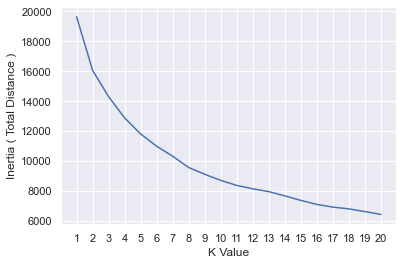

In [28]:
def cluster_variance(n):
    variances=[]
    kmeans=[]
    outputs=[]
    K=[i for i in range(1,n+1)]
    for i in range(1,n+1):
        variance=0
        model=KMeans(n_clusters=i,random_state=1,verbose=2).fit(new_train_scaled)
        kmeans.append(model)
        variances.append(model.inertia_)
        
    return variances,K,n
variances,K,n=cluster_variance(20)
plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()

#### 10개의 군집으로 나눈다.

In [34]:
k = 10

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 1)

# 정규화된 데이터에 학습
model.fit(new_train_scaled)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
new_train_scaled['cluster'] = model.fit_predict(new_train_scaled)

In [47]:
new_train_scaled

gender  car  reality  income_total  income_type  edu_type  family_type  \
0         0.0  1.0      1.0      0.495528         0.00      0.00         0.00   
1         0.0  0.0      0.0      0.433722         0.25      0.25         0.00   
2         1.0  1.0      0.0      0.395811         0.25      0.00         0.00   
3         0.0  1.0      0.0      0.350973         0.25      0.00         0.00   
4         1.0  1.0      1.0      0.521439         0.25      0.00         0.00   
...       ...  ...      ...           ...          ...       ...          ...   
13223     0.0  0.0      0.0      0.521439         0.25      0.00         0.75   
13224     0.0  1.0      1.0      0.585963         0.50      0.25         0.00   
13225     0.0  0.0      1.0      0.395811         0.25      0.00         1.00   
13226     1.0  0.0      1.0      0.433722         0.50      0.00         0.00   
13227     0.0  1.0      1.0      0.225345         0.25      0.25         0.00   

       house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0             0.0    0.649166       0.000000         0.0    0.0    0.000000   
1             0.0    0.462429       0.593706         0.0    0.0    0.055556   
2             0.0    0.331174       0.776724         1.0    0.0    0.111111   
3             0.0    0.261650       0.519263         0.0    0.0    0.166667   
4             0.0    0.485470       0.804310         0.0    0.0    0.222222   
...           ...         ...            ...         ...    ...         ...   
13223         0.0    0.742363       0.893915         0.0    0.0    0.444444   
13224         0.0    0.613515       0.844069         0.0    0.0    0.055556   
13225         0.0    0.396630       0.927880         0.0    1.0    0.000000   
13226         0.0    0.170287       0.802328         0.0    1.0    0.111111   
13227         0.0    0.241875       0.764974         0.0    0.0    0.000000   

       family_size  begin_month        ID  cluster  
0         0.071429     0.883333  0.000000        9  
1         0.142857     0.433333  0.000154        7  
2         0.071429     0.150000  0.000308        3  
3         0.214286     0.200000  0.000463        5  
4         0.142857     0.050000  0.000617        6  
...            ...          ...       ...      ...  
13223     0.000000     0.716667  0.738514        7  
13224     0.071429     0.883333  0.287080        5  
13225     0.071429     0.566667  0.999846        1  
13226     0.142857     0.266667  0.204903        8  
13227     0.214286     0.066667  1.000000        5  

[13228 rows x 17 columns]

#### Cluster column도 다시 minmax scaling

In [31]:
# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_train_scaled)

# df로 정리해서 확인
new_train_scaled = pd.DataFrame(normalized_data, columns= new_train_scaled.columns)
new_train_scaled.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0     0.0  1.0      1.0      0.495528         0.00      0.00          0.0   
1     0.0  0.0      0.0      0.433722         0.25      0.25          0.0   
2     1.0  1.0      0.0      0.395811         0.25      0.00          0.0   
3     0.0  1.0      0.0      0.350973         0.25      0.00          0.0   
4     1.0  1.0      1.0      0.521439         0.25      0.00          0.0   

   house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0         0.0    0.649166       0.000000         0.0    0.0    0.000000   
1         0.0    0.462429       0.593706         0.0    0.0    0.055556   
2         0.0    0.331174       0.776724         1.0    0.0    0.111111   
3         0.0    0.261650       0.519263         0.0    0.0    0.166667   
4         0.0    0.485470       0.804310         0.0    0.0    0.222222   

   family_size  begin_month        ID   cluster  
0     0.071429     0.883333  0.000000  1.000000  
1     0.142857     0.433333  0.000154  0.777778  
2     0.071429     0.150000  0.000308  0.333333  
3     0.214286     0.200000  0.000463  0.555556  
4     0.142857     0.050000  0.000617  0.666667

In [32]:
new_train_label.to_csv('new_train_label_scaled+kmeans.csv', index=False)
new_train_scaled.to_csv('new_train_scaled+kmeans.csv', index=False)

#### 14 .SOM

In [48]:
new_train_scaled =  new_train_scaled.drop(columns=['cluster'])
new_train_scaled.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0     0.0  1.0      1.0      0.495528         0.00      0.00          0.0   
1     0.0  0.0      0.0      0.433722         0.25      0.25          0.0   
2     1.0  1.0      0.0      0.395811         0.25      0.00          0.0   
3     0.0  1.0      0.0      0.350973         0.25      0.00          0.0   
4     1.0  1.0      1.0      0.521439         0.25      0.00          0.0   

   house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0         0.0    0.649166       0.000000         0.0    0.0    0.000000   
1         0.0    0.462429       0.593706         0.0    0.0    0.055556   
2         0.0    0.331174       0.776724         1.0    0.0    0.111111   
3         0.0    0.261650       0.519263         0.0    0.0    0.166667   
4         0.0    0.485470       0.804310         0.0    0.0    0.222222   

   family_size  begin_month        ID  
0     0.071429     0.883333  0.000000  
1     0.142857     0.433333  0.000154  
2     0.071429     0.150000  0.000308  
3     0.214286     0.200000  0.000463  
4     0.142857     0.050000  0.000617

In [49]:
som_data = new_train_scaled.to_numpy()

#### K-means 때와 비슷하게 3 * 3 = 9 개 군집으로 클러스터링

In [50]:
som = MiniSom(x= 3, y= 3, input_len= 16, sigma = 1.0, learning_rate = 0.5, random_seed=1)
som.random_weights_init(som_data)
som.train_random(data = som_data, num_iteration = 100)
som_shape = (3, 3)

In [51]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in som_data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

(array([3854., 1290., 2038., 1113.,    0.,  801., 1765.,  442.,  659.,
        1266.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

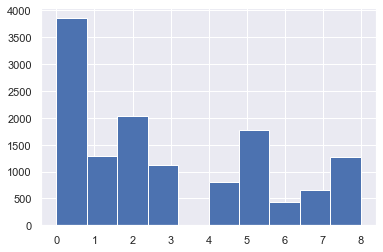

In [52]:
plt.hist(cluster_index)

In [53]:
cluster = pd.DataFrame(cluster_index, columns=['cluster'])

In [54]:
new_train_scaled = pd.concat([new_train_scaled,cluster], axis =1)
new_train_scaled

gender  car  reality  income_total  income_type  edu_type  family_type  \
0         0.0  1.0      1.0      0.495528         0.00      0.00         0.00   
1         0.0  0.0      0.0      0.433722         0.25      0.25         0.00   
2         1.0  1.0      0.0      0.395811         0.25      0.00         0.00   
3         0.0  1.0      0.0      0.350973         0.25      0.00         0.00   
4         1.0  1.0      1.0      0.521439         0.25      0.00         0.00   
...       ...  ...      ...           ...          ...       ...          ...   
13223     0.0  0.0      0.0      0.521439         0.25      0.00         0.75   
13224     0.0  1.0      1.0      0.585963         0.50      0.25         0.00   
13225     0.0  0.0      1.0      0.395811         0.25      0.00         1.00   
13226     1.0  0.0      1.0      0.433722         0.50      0.00         0.00   
13227     0.0  1.0      1.0      0.225345         0.25      0.25         0.00   

       house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0             0.0    0.649166       0.000000         0.0    0.0    0.000000   
1             0.0    0.462429       0.593706         0.0    0.0    0.055556   
2             0.0    0.331174       0.776724         1.0    0.0    0.111111   
3             0.0    0.261650       0.519263         0.0    0.0    0.166667   
4             0.0    0.485470       0.804310         0.0    0.0    0.222222   
...           ...         ...            ...         ...    ...         ...   
13223         0.0    0.742363       0.893915         0.0    0.0    0.444444   
13224         0.0    0.613515       0.844069         0.0    0.0    0.055556   
13225         0.0    0.396630       0.927880         0.0    1.0    0.000000   
13226         0.0    0.170287       0.802328         0.0    1.0    0.111111   
13227         0.0    0.241875       0.764974         0.0    0.0    0.000000   

       family_size  begin_month        ID  cluster  
0         0.071429     0.883333  0.000000        1  
1         0.142857     0.433333  0.000154        3  
2         0.071429     0.150000  0.000308        8  
3         0.214286     0.200000  0.000463        8  
4         0.142857     0.050000  0.000617        5  
...            ...          ...       ...      ...  
13223     0.000000     0.716667  0.738514        6  
13224     0.071429     0.883333  0.287080        1  
13225     0.071429     0.566667  0.999846        0  
13226     0.142857     0.266667  0.204903        4  
13227     0.214286     0.066667  1.000000        1  

[13228 rows x 17 columns]

#### clustering 다시 minmax scaling

In [40]:
# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_train_scaled)

# df로 정리해서 확인
new_train_scaled = pd.DataFrame(normalized_data, columns= new_train_scaled.columns)
new_train_scaled.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0     0.0  1.0      1.0      0.495528         0.00      0.00          0.0   
1     0.0  0.0      0.0      0.433722         0.25      0.25          0.0   
2     1.0  1.0      0.0      0.395811         0.25      0.00          0.0   
3     0.0  1.0      0.0      0.350973         0.25      0.00          0.0   
4     1.0  1.0      1.0      0.521439         0.25      0.00          0.0   

   house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0         0.0    0.649166       0.000000         0.0    0.0    0.000000   
1         0.0    0.462429       0.593706         0.0    0.0    0.055556   
2         0.0    0.331174       0.776724         1.0    0.0    0.111111   
3         0.0    0.261650       0.519263         0.0    0.0    0.166667   
4         0.0    0.485470       0.804310         0.0    0.0    0.222222   

   family_size  begin_month        ID  cluster  
0     0.071429     0.883333  0.000000    0.125  
1     0.142857     0.433333  0.000154    0.375  
2     0.071429     0.150000  0.000308    1.000  
3     0.214286     0.200000  0.000463    1.000  
4     0.142857     0.050000  0.000617    0.625

In [41]:
new_train_label.to_csv('new_train_label_scaled+som.csv', index=False)
new_train_scaled.to_csv('new_train_scaled+som.csv', index=False)

### Test data에 대해서도 동일하게 진행

In [60]:
X = pd.read_csv("data/test/test.csv")
X = X.drop(columns=['index'])
y = pd.read_csv("data/test/test_label.csv")
y = y.drop(columns=['index'])
df = pd.concat([X,y], axis =1)

# null 값 None으로 채움
df = df.fillna('None')

# FLAG_MOBIL 열 삭제
df = df.drop(columns=['FLAG_MOBIL'])

# 추가 ID 컬럼 생성
df['ID'] = \
df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

# income_total 로그 스케일링
df['income_total'] = np.log(df['income_total'])

# 음수값 양수값으로 변환
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] * -1
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * -1
df['begin_month'] = df['begin_month'] * -1

# DAYS_EMPLOYED 365343값 0으로 변경 및 로그 스케일링
df.loc[df['DAYS_EMPLOYED'] == -365243, 'DAYS_EMPLOYED'] = 0
df['DAYS_EMPLOYED'] = np.log1p(df['DAYS_EMPLOYED'])

# phone 열 삭제
df = df.drop(columns=['phone'])

# child_num 열 삭제
df = df.drop(columns=['child_num'])

# one-hot incoding
df.loc[df['gender'] == 'F', 'gender'] = 0
df.loc[df['gender'] == 'M', 'gender'] = 1

df.loc[df['car'] == 'Y', 'car'] = 1
df.loc[df['car'] == 'N', 'car'] = 0

df.loc[df['reality'] == 'Y', 'reality'] = 1
df.loc[df['reality'] == 'N', 'reality'] = 0

categorical_feats = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

df[categorical_feats] = encoder.transform(df[categorical_feats])

df['ID'] = df['ID'].astype('int64')

In [61]:
new_test_label = df["credit"]
new_test = df.drop(["credit"], axis=1)

In [62]:
# scaling 전
new_test_label.to_csv('new_test_label.csv', index=False)
new_test.to_csv('new_test.csv', index=False)

In [63]:
# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_test)

# df로 정리해서 확인
new_test_scaled = pd.DataFrame(normalized_data, columns= new_test.columns)
new_test_scaled.head()


new_test_label.to_csv('new_test_label_scaled.csv', index=False)
new_test_scaled.to_csv('new_test_scaled.csv', index=False)

In [64]:
new_test_scaled['cluster'] = model.fit_predict(new_test_scaled)

In [68]:
# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_train_scaled)

# df로 정리해서 확인
new_train_scaled = pd.DataFrame(normalized_data, columns= new_train_scaled.columns)
new_train_scaled.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0     0.0  1.0      1.0      0.495528         0.00      0.00          0.0   
1     0.0  0.0      0.0      0.433722         0.25      0.25          0.0   
2     1.0  1.0      0.0      0.395811         0.25      0.00          0.0   
3     0.0  1.0      0.0      0.350973         0.25      0.00          0.0   
4     1.0  1.0      1.0      0.521439         0.25      0.00          0.0   

   house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0         0.0    0.649166       0.000000         0.0    0.0    0.000000   
1         0.0    0.462429       0.593706         0.0    0.0    0.055556   
2         0.0    0.331174       0.776724         1.0    0.0    0.111111   
3         0.0    0.261650       0.519263         0.0    0.0    0.166667   
4         0.0    0.485470       0.804310         0.0    0.0    0.222222   

   family_size  begin_month        ID  cluster  
0     0.071429     0.883333  0.000000    0.125  
1     0.142857     0.433333  0.000154    0.375  
2     0.071429     0.150000  0.000308    1.000  
3     0.214286     0.200000  0.000463    1.000  
4     0.142857     0.050000  0.000617    0.625

In [69]:
new_test_label.to_csv('new_test_label_scaled+kmeans.csv', index=False)
new_test_scaled.to_csv('new_test_scaled+kmeans.csv', index=False)

gender  car  reality  income_total  income_type  edu_type  family_type  \
0     1.0  0.0      1.0      0.506222         0.25       0.0         0.25   
1     0.0  0.0      1.0      0.433722         0.00       0.0         0.75   
2     0.0  0.0      1.0      0.125628         0.50       0.0         0.00   
3     1.0  0.0      1.0      0.566278         0.25       0.0         0.25   
4     0.0  0.0      1.0      0.495528         0.25       0.0         0.00   

   house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  email  occyp_type  \
0         0.0    0.134868       0.725219         1.0    0.0    0.277778   
1         0.0    0.954068       0.000000         0.0    0.0    0.000000   
2         0.0    0.459379       0.749256         1.0    0.0    0.055556   
3         0.0    0.217144       0.859203         0.0    0.0    0.111111   
4         0.0    0.471149       0.824677         0.0    0.0    0.111111   

   family_size  begin_month        ID  cluster  
0     0.000000     0.166667  0.051333    0.500  
1     0.000000     0.866667  0.269616    0.250  
2     0.052632     0.250000  0.688146    0.125  
3     0.105263     0.400000  0.053800    0.500  
4     0.052632     0.900000  0.000000    0.000

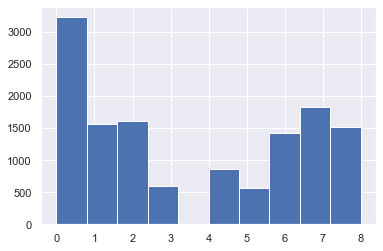

In [70]:
new_test_scaled =  new_test_scaled.drop(columns=['cluster'])

som_data = new_test_scaled.to_numpy()

som = MiniSom(x= 3, y= 3, input_len= 16, sigma = 1.0, learning_rate = 0.5, random_seed=1)
som.random_weights_init(som_data)
som.train_random(data = som_data, num_iteration = 100)
som_shape = (3, 3)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in som_data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

plt.hist(cluster_index)

cluster = pd.DataFrame(cluster_index, columns=['cluster'])

new_test_scaled = pd.concat([new_test_scaled,cluster], axis =1)

# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_test_scaled)

# df로 정리해서 확인
new_test_scaled = pd.DataFrame(normalized_data, columns= new_train_scaled.columns)
new_test_scaled.head()


In [71]:
new_test_label.to_csv('new_test_label_scaled+som.csv', index=False)
new_test_scaled.to_csv('new_test_scaled+som.csv', index=False)